In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Máxima\II Región\MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MAX_RBE    LAT_Y    LON_X
0      M_001_B_II     II  1994-06-01          22.4 -22.4953 -69.9044
1      M_001_B_II     II  1994-06-02          24.8 -22.4953 -69.9044
2      M_001_B_II     II  1994-06-03          26.8 -22.4953 -69.9044
3      M_001_B_II     II  1994-06-04          23.4 -22.4953 -69.9044
4      M_001_B_II     II  1994-06-05          23.2 -22.4953 -69.9044
...           ...    ...         ...           ...      ...      ...
90448    M_225_AA     II  2009-04-08          21.9 -23.4330 -70.4500
90449    M_225_AA     II  2009-05-02          20.3 -23.4330 -70.4500
90450    M_225_AA     II  2009-08-15          17.1 -23.4330 -70.4500
90451    M_225_AA     II  2009-10-12          17.0 -23.4330 -70.4500
90452    M_221_AA     II  1994-06-27          29.1 -22.5000 -68.9000

[90453 rows x 6 columns]


ID_CIDERH   M_017_A_II  M_023_A_II  M_024_A_II  M_027_A_II
ID_CIDERH                                                 
M_017_A_II    1.000000    0.666624    0.663123    0.624978
M_023_A_II    0.666624    1.000000    0.763921    0.720562
M_024_A_II    0.663123    0.763921    1.000000    0.680872
M_027_A_II    0.624978    0.720562    0.680872    1.000000


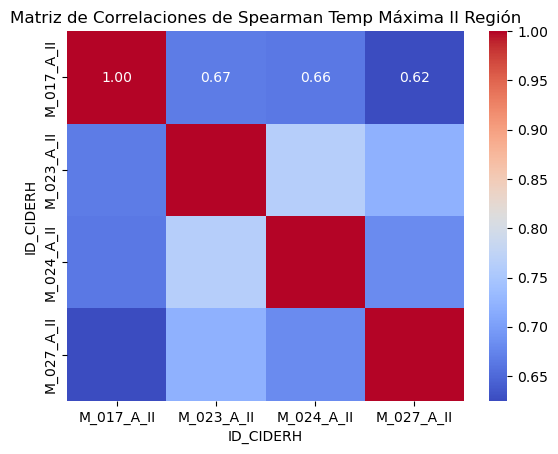

Cantidad de datos de TEMP_MAX_RBE por estación:
ID_CIDERH
M_017_A_II    6120
M_023_A_II    5106
M_024_A_II    5970
M_027_A_II    5429
Name: TEMP_MAX_RBE, dtype: int64


In [3]:
# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_024_A_II', 'M_023_A_II', 'M_027_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MAX_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman Temp Máxima II Región')
plt.show()

# Contar la cantidad de datos de TEMP_MAX_RBE para cada estación seleccionada
cantidad_datos_temp_min_por_estacion = datos_especificos.groupby('ID_CIDERH')['TEMP_MAX_RBE'].count()

# Mostrar la cantidad de datos para cada estación
print("Cantidad de datos de TEMP_MAX_RBE por estación:")
print(cantidad_datos_temp_min_por_estacion)

In [2]:
import pandas as pd
from scipy.stats import anderson
import numpy as np

def anderson_darling_p_value(statistic):
    """Calcula el valor p aproximado para el estadístico de Anderson-Darling."""
    if statistic < 0.2:
        return 1 - np.exp(-13.436 + 101.14 * statistic - 223.73 * statistic**2)
    elif statistic < 0.34:
        return 1 - np.exp(-8.318 + 42.796 * statistic - 59.938 * statistic**2)
    elif statistic < 0.6:
        return np.exp(0.9177 - 4.279 * statistic - 1.38 * statistic**2)
    elif statistic < 10:
        return np.exp(1.2937 - 5.709 * statistic + 0.0186 * statistic**2)
    else:
        return np.exp(1.2937 - 5.709 * 10 + 0.0186 * 10**2)

# Cargar el archivo CSV
df = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Máxima\II Región\MatrizTMII.csv")

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_023_A_II', 'M_024_A_II', 'M_027_A_II']

# Nivel de significancia para la prueba de Anderson-Darling
significance_level = 0.05

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MAX_RBE)
    temp_min_data = estacion_data['TEMP_MAX_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Calcular la prueba de Anderson-Darling
    result = anderson(temp_min_data, dist='norm')

    print("Resultados de la prueba de Anderson-Darling para la estación", estacion_id)
    print("Estadístico de Anderson-Darling:", result.statistic)

    # Calcular el valor p aproximado
    p_value = anderson_darling_p_value(result.statistic)
    print("Valor p aproximado: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Anderson-Darling para la estación M_017_A_II
Estadístico de Anderson-Darling: 27.192268804602463
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_023_A_II
Estadístico de Anderson-Darling: 16.84239258100206
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_024_A_II
Estadístico de Anderson-Darling: 10.724590681740665
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Anderson-Darling para la estación M_027_A_II
Estadístico de Anderson-Darling: 30.30054434995145
Valor p aproximado: 3.76e-24
La hipótesis nula se rechaza al nivel de significancia 0.05.


In [4]:
from statsmodels.stats.diagnostic import lilliefors

# Cargar datos desde el archivo CSV
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Máxima\II Región\MatrizTMII.csv"
datos = pd.read_csv(archivo_csv, low_memory=False)

# Filtrar datos para la variable TEMP_MIN_RBE
variable_interes = 'TEMP_MAX_RBE'

# Iterar sobre cada estación meteorológica
estaciones = datos['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_023_A_II', 'M_024_A_II', 'M_027_A_II']

for estacion in estaciones_especificas:
    # Filtrar datos para la estación actual
    datos_estacion = datos[datos['ID_CIDERH'] == estacion][variable_interes]

    # Realizar prueba de normalidad de Lilliefors
    estadistico, p_valor = lilliefors(datos_estacion)

    # Imprimir resultados
    print(f"Estación: {estacion}")
    print(f"Estadístico de prueba: {estadistico}")
    print(f"P-valor: {p_valor}")

Estación: M_017_A_II
Estadístico de prueba: 0.06947037713305404
P-valor: 0.0009999999999998899
Estación: M_023_A_II
Estadístico de prueba: 0.05687367292243517
P-valor: 0.0009999999999998899
Estación: M_024_A_II
Estadístico de prueba: 0.060607407699884375
P-valor: 0.0009999999999998899
Estación: M_027_A_II
Estadístico de prueba: 0.07719004792205819
P-valor: 0.0009999999999998899


In [5]:
import pandas as pd
from scipy.stats import kstest, norm

# Cargar el archivo CSV
df = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Matrices\Temperatura Máxima\II Región\MatrizTMII.csv")

# Obtener la lista de estaciones únicas
estaciones = df['ID_CIDERH'].unique()

# Lista de estaciones específicas
estaciones_especificas = ['M_017_A_II', 'M_023_A_II', 'M_024_A_II', 'M_027_A_II']

# Iterar sobre cada estación
for estacion_id in estaciones_especificas:
    # Filtrar los datos para la estación ID_CIDERH específica
    estacion_data = df[df['ID_CIDERH'] == estacion_id]

    # Seleccionar la variable de interés (TEMP_MAX_RBE)
    temp_min_data = estacion_data['TEMP_MAX_RBE']

    # Eliminar valores NaN si es necesario
    temp_min_data = temp_min_data.dropna()

    # Normalizar los datos a una distribución normal estándar
    mean = temp_min_data.mean()
    std = temp_min_data.std()
    standardized_data = (temp_min_data - mean) / std

    # Calcular la prueba de Kolmogorov-Smirnov
    statistic, p_value = kstest(standardized_data, 'norm')

    print("Resultados de la prueba de Kolmogorov-Smirnov para la estación", estacion_id)
    print("Estadístico de prueba:", statistic)
    print("Valor p: {:.2e}".format(p_value))

    # Evaluar si se rechaza la hipótesis nula al nivel de significancia dado
    if p_value < significance_level:
        print(f"La hipótesis nula se rechaza al nivel de significancia {significance_level}.")
    else:
        print(f"No se puede rechazar la hipótesis nula al nivel de significancia {significance_level}.")

Resultados de la prueba de Kolmogorov-Smirnov para la estación M_017_A_II
Estadístico de prueba: 0.06947037713305304
Valor p: 3.98e-26
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_023_A_II
Estadístico de prueba: 0.05687367292243495
Valor p: 8.50e-15
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_024_A_II
Estadístico de prueba: 0.06060740769988482
Valor p: 1.66e-19
La hipótesis nula se rechaza al nivel de significancia 0.05.
Resultados de la prueba de Kolmogorov-Smirnov para la estación M_027_A_II
Estadístico de prueba: 0.07719004792205686
Valor p: 1.40e-28
La hipótesis nula se rechaza al nivel de significancia 0.05.
